In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
Base = automap_base()

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(autoload_with=engine)

In [58]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

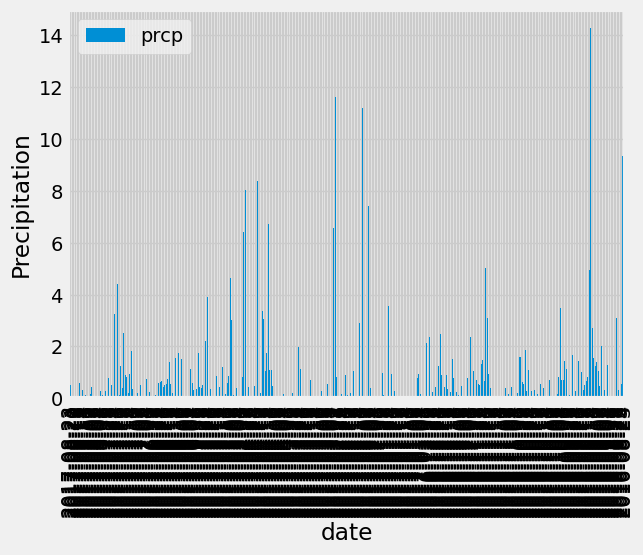

In [164]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date.fromisoformat(recent_date_str)
# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_results = pd.DataFrame(year_data).dropna()
# Sort the dataframe by date
date_results = data_results.groupby(["date"]).sum()
# Use Pandas Plotting with Matplotlib to plot the data
plot_bar = date_results.sort_values(by = ['date'], ascending=False).plot.bar(rot=90, ylabel="Precipitation")
plt.show()

In [92]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_results.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [114]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Measurement.station).all()
stations_data =pd.DataFrame(stations)
stations_count = len(stations_data["station"].unique())
print(stations_count)

9


In [139]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
data = session.query(Measurement.station, Measurement.tobs)
data_df =pd.DataFrame(data)
most_active = data_df.groupby(["station"]).count()
sorted = most_active.sort_values("tobs", ascending=False)
print(sorted)

             tobs
station          
USC00519281  2772
USC00519397  2724
USC00513117  2709
USC00519523  2669
USC00516128  2612
USC00514830  2202
USC00511918  1979
USC00517948  1372
USC00518838   511


In [150]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_loc = data_df[data_df["station"] == "USC00519281"]
lowest = most_active_loc.min()
max = most_active_loc.max()
average = most_active_loc["tobs"].mean()
print(lowest, max, average)

station    USC00519281
tobs              54.0
dtype: object station    USC00519281
tobs              85.0
dtype: object 71.66378066378067


array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

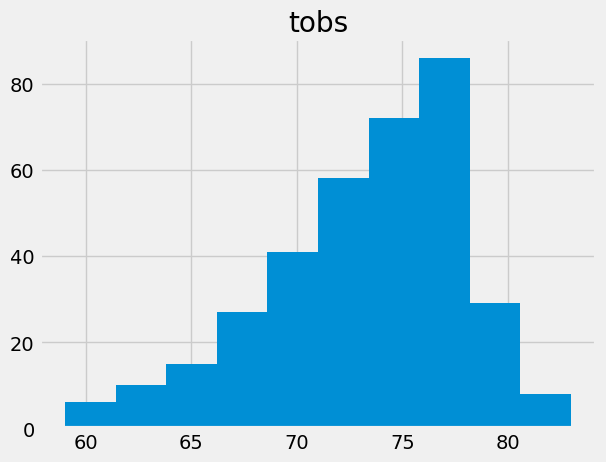

In [176]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= year_ago).all()
year_temp_data_df = pd.DataFrame(year_temp_data)
most_active_data = year_temp_data_df[year_temp_data_df["station"] == "USC00519281"]
most_active_data.hist()

# Close Session

In [16]:
# Close Session
session.close()